<a href="https://colab.research.google.com/github/johhan27/DS-Unit-2-Linear-Models/blob/master/LS_DS_211_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression I

During the guided project, we predicted how much it would cost to buy a condo in Tribecca. For the module project, your goal will be similar: predict how much it costs to rent an apartment in New York City.

Dataset source: [renthop.com](https://www.renthop.com/).

## Directions

> Do Not Copy-Paste. You must *type* each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.
>
> — Zed Shaw, [Learn Python the Hard Way](https://learnpythonthehardway.org/)

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using wrangle function.
- **Task 2:** Conduct exploratory data analysis (EDA) and plot the relationship between one feature and the target `'price'`.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Establish the baseline mean absolute error for your dataset.
- **Task 5:** Build and train a `Linearregression` model.
- **Task 6:** Check the mean absolute error of our model on the training data.
- **Task 7:** Extract and print the intercept and coefficient from your `LinearRegression` model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

## I. Wrangle Data

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Use the above `wrangle` function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [192]:
df = wrangle(filepath)
df.tail()

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
49347        1.0         2  ...                 0                    0
49348        1.0         1  ...                 0                    1
49349        1.0         1  ...                 0                    0
49350        1.0         0  ...                 0                    0
49351        1.0         2  ...                 0                    0

[5 rows x 34 columns]

In [193]:
df.describe(exclude='number')

created description  ... street_address interest_level
count                 48817       47392  ...          48807          48817
unique                48148       37853  ...          15135              3
top     2016-06-12 12:30:28              ...  3333 Broadway            low
freq                      3        1627  ...            174          33946

[4 rows x 5 columns]

In [195]:
def interest_to_numeric(interest_level):
  if interest_level == 'low':
    return 1
  elif interest_level == 'medium':
    return 2
  else:
    return 3

df['interest_numeric'] = df['interest_level'].apply(interest_to_numeric)

In [201]:
df.head()

bathrooms  bedrooms  ... common_outdoor_space interest_numeric
0        1.5         3  ...                    0                2
1        1.0         2  ...                    0                1
2        1.0         1  ...                    0                3
3        1.0         1  ...                    0                1
4        1.0         4  ...                    0                1

[5 rows x 35 columns]

In [196]:
df.describe()

bathrooms      bedrooms  ...  common_outdoor_space  interest_numeric
count  48817.000000  48817.000000  ...          48817.000000      48817.000000
mean       1.201794      1.537149  ...              0.026241          1.380216
std        0.470711      1.106087  ...              0.159852          0.621962
min        0.000000      0.000000  ...              0.000000          1.000000
25%        1.000000      1.000000  ...              0.000000          1.000000
50%        1.000000      1.000000  ...              0.000000          1.000000
75%        1.000000      2.000000  ...              0.000000          2.000000
max       10.000000      8.000000  ...              1.000000          3.000000

[8 rows x 30 columns]

In [197]:
numeric_cols = df.describe().columns
print (numeric_cols)

Index(['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'elevator',
       'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman',
       'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
       'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space',
       'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool',
       'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio',
       'wheelchair_access', 'common_outdoor_space', 'interest_numeric'],
      dtype='object')


In [198]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49351
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48817 non-null  float64
 1   bedrooms              48817 non-null  int64  
 2   latitude              48817 non-null  float64
 3   longitude             48817 non-null  float64
 4   price                 48817 non-null  int64  
 5   elevator              48817 non-null  int64  
 6   cats_allowed          48817 non-null  int64  
 7   hardwood_floors       48817 non-null  int64  
 8   dogs_allowed          48817 non-null  int64  
 9   doorman               48817 non-null  int64  
 10  dishwasher            48817 non-null  int64  
 11  no_fee                48817 non-null  int64  
 12  laundry_in_building   48817 non-null  int64  
 13  fitness_center        48817 non-null  int64  
 14  pre-war               48817 non-null  int64  
 15  laundry_in_unit    

In [207]:
x_cols = [i for i in numeric_cols.array]
x_cols.remove('price')
print (x_cols)

['bathrooms', 'bedrooms', 'latitude', 'longitude', 'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio', 'wheelchair_access', 'common_outdoor_space', 'interest_numeric']


**Task 2:** Use your `pandas` and dataviz skills to explore the dataset. As part of this process, make a scatter plot that shows the relationship between one of the numerical features in the dataset and the target `'price'`.

**Remember:** You should plot your feature on the `X` axis and your target on the `y` axis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

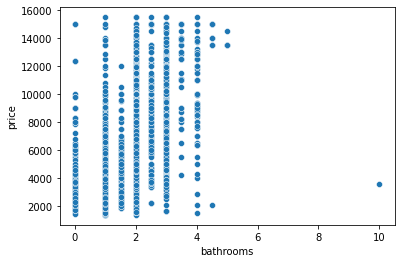

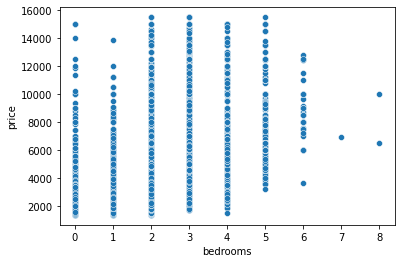

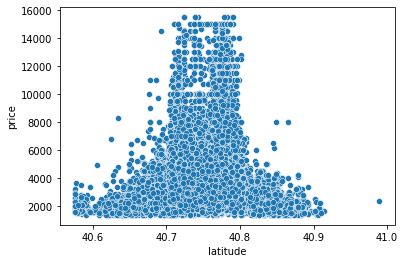

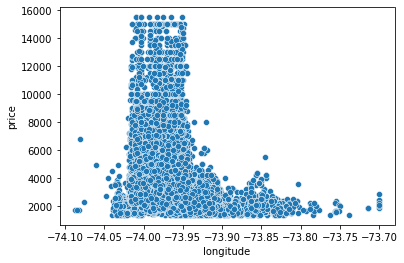

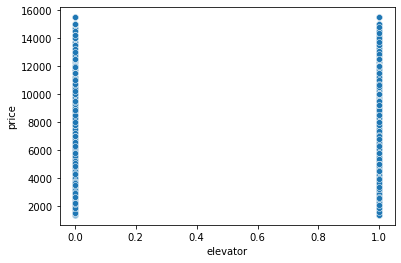

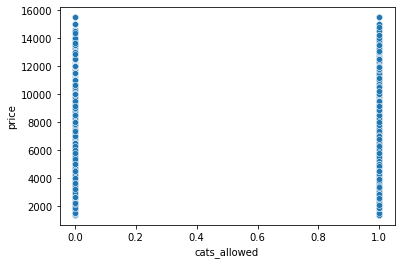

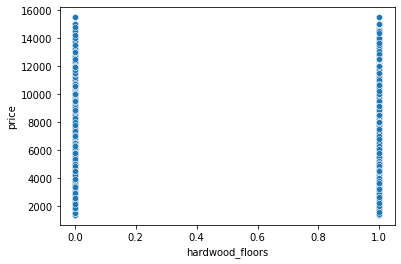

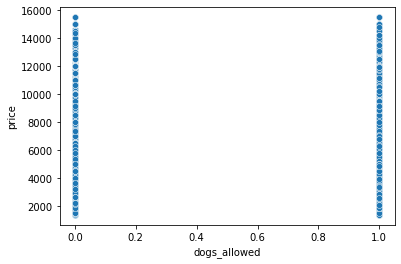

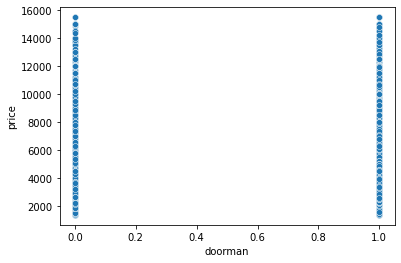

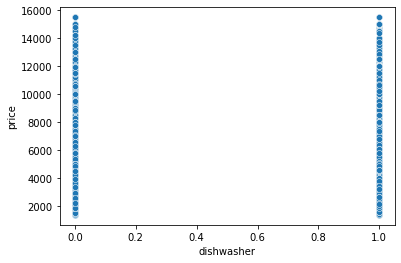

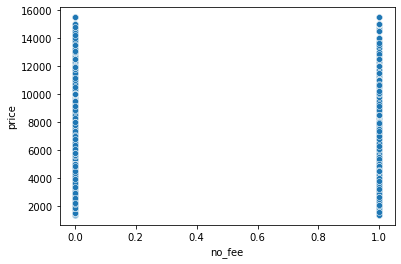

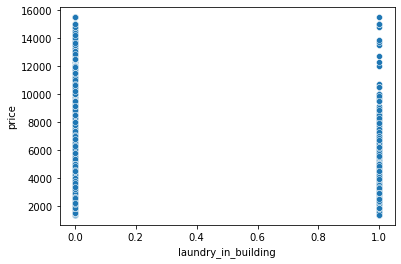

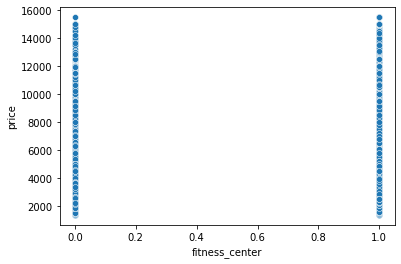

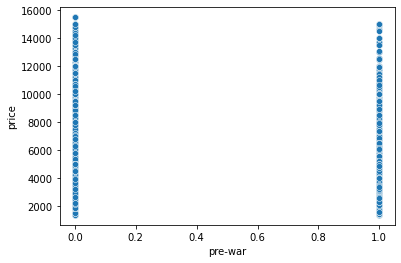

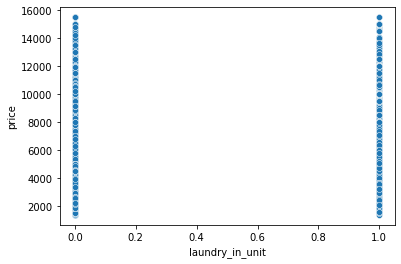

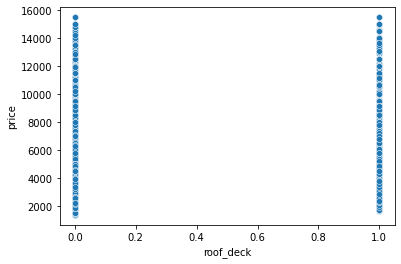

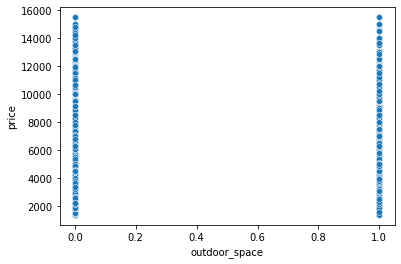

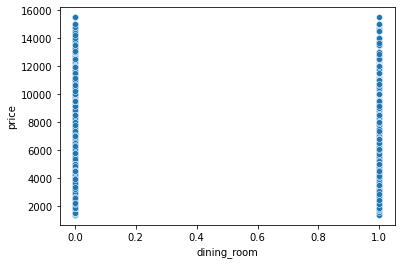

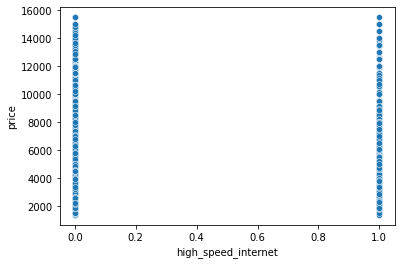

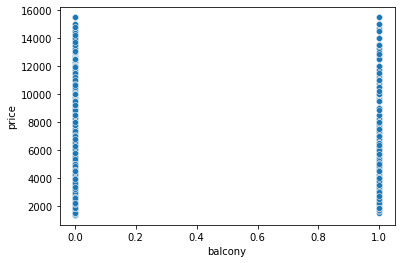

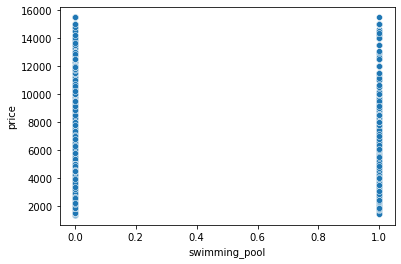

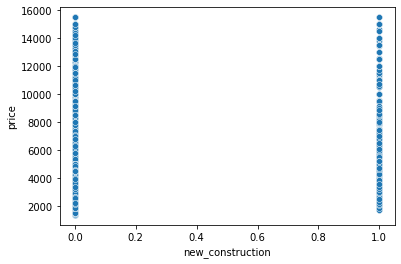

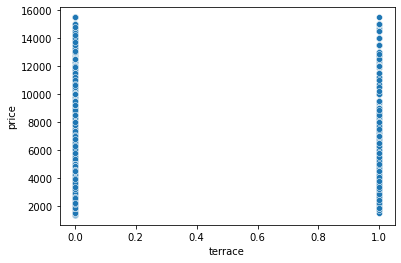

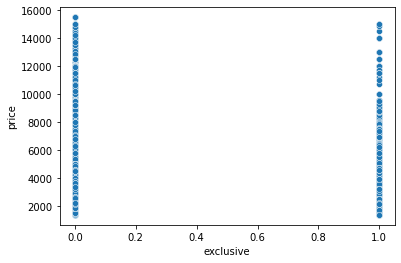

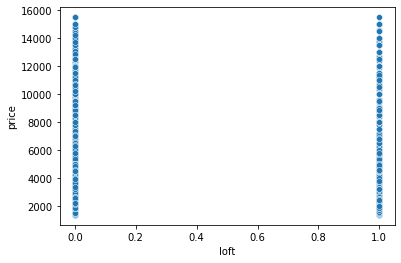

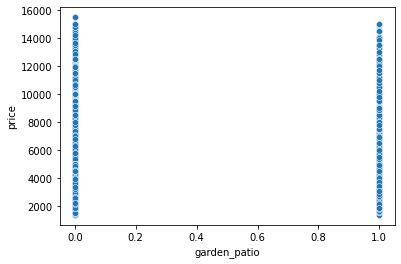

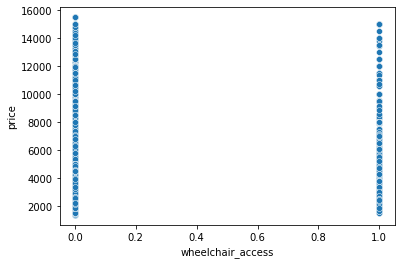

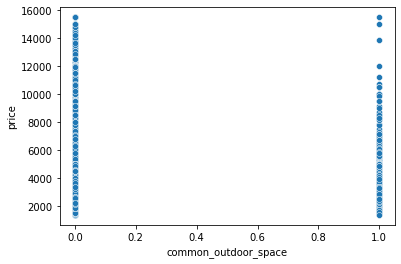

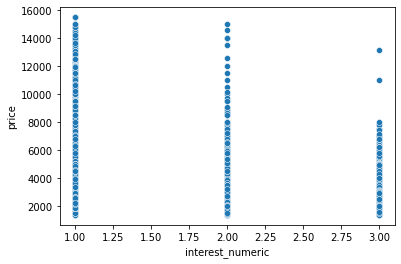

In [200]:
import seaborn as sns 
for i, numeric_col in enumerate(x_cols):
  plt.figure(i)
  sns.scatterplot(data=df, x=numeric_col, y='price')

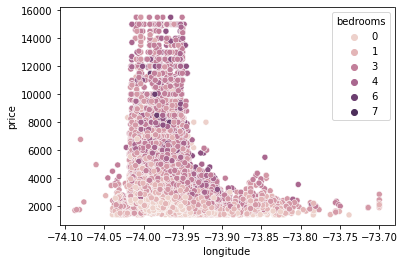

In [58]:
sns.scatterplot(data=df, x='longitude', y='price', hue='bedrooms')

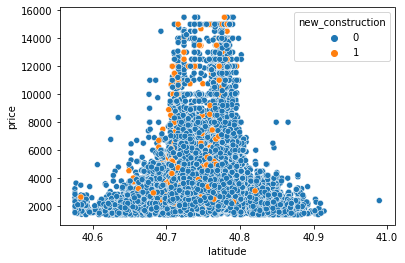

In [67]:
sns.scatterplot(data=df, x='latitude', y='price', hue='new_construction')

In [231]:
df['l_sum'] = df['latitude']+df['longitude']
df['b_sum'] = df['bedrooms']+df['bathrooms']

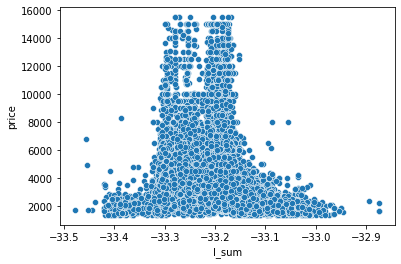

In [176]:
sns.scatterplot(data=df, x='l_sum', y='price') #not very useful 

In [175]:
import plotly.express as px
px.scatter(df, x='b_sum', y='price', trendline='ols') #b_sum is bedroom + bathroom... it's giving us ideas

In [206]:
print(x_cols) #all our indepent variables

['bathrooms', 'bedrooms', 'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio', 'wheelchair_access', 'common_outdoor_space', 'interest_numeric']


In [208]:
# latitude and longitude are not helpful for the sum we plan to do
x_cols.remove('latitude')
x_cols.remove('longitude')
print(x_cols)

['bathrooms', 'bedrooms', 'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio', 'wheelchair_access', 'common_outdoor_space', 'interest_numeric']


Let's find the columns that are more common among the over
-the-mean-price rents to create our own index 

In [261]:
from numpy import median
over_mean_minus_below_mean = df.loc[df['price'] > df['price'].mean()][x_cols].sum() - df.loc[df['price'] < df['price'].mean()][x_cols].sum()
print(over_mean_minus_below_mean)

bathrooms               -5204.0
bedrooms                 5115.0
elevator                -2927.0
cats_allowed            -4964.0
hardwood_floors         -4968.0
dogs_allowed            -4382.0
doorman                  -478.0
dishwasher              -1303.0
no_fee                  -2606.0
laundry_in_building      -874.0
fitness_center            503.0
pre-war                 -3027.0
laundry_in_unit          1437.0
roof_deck                -233.0
outdoor_space              34.0
dining_room              1024.0
high_speed_internet      -147.0
balcony                   478.0
swimming_pool             265.0
new_construction         -268.0
terrace                   397.0
exclusive                -694.0
loft                     -831.0
garden_patio              184.0
wheelchair_access          17.0
common_outdoor_space     -237.0
interest_numeric       -23532.0
dtype: float64


In [262]:
df_over_mean_minus_below_mean = pd.DataFrame(over_mean_minus_below_mean) #made a df to manipulate it b

In [263]:
#we take the positive values as top columns and negative values as lower columns
index_top_cols = list (df_over_mean_minus_below_mean.loc[df_over_mean_minus_below_mean[0] > 0].index)
print ("top", index_top_cols)
index_lower_cols = list (df_over_mean_minus_below_mean.loc[df_over_mean_minus_below_mean[0] < 0].index)
print ("lower", index_lower_cols)
#creating our index column here with the top columns
df['index'] = df[index_top_cols].sum(axis=1)
df['total_sum'] = df[x_cols]

top ['bedrooms', 'fitness_center', 'laundry_in_unit', 'outdoor_space', 'dining_room', 'balcony', 'swimming_pool', 'terrace', 'garden_patio', 'wheelchair_access']
lower ['bathrooms', 'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee', 'laundry_in_building', 'pre-war', 'roof_deck', 'high_speed_internet', 'new_construction', 'exclusive', 'loft', 'common_outdoor_space', 'interest_numeric']


In [264]:
px.scatter(df, x='index', y='price', trendline='ols')

#  II. Split Data

**Task 3:** Choose one feature from the dataset and assign it to your feature matrix `X`. Then assign the column `'price'` to the target vector `y`.

**Remember:** Your feature matrix needs to be two-dimensional, but your feature matrix must be one-dimensional.

In [268]:
from sklearn.model_selection import train_test_split

features=['index', 'bathrooms'] #we add bathrooms because it gives better results than index alone and "b_sum"
target = ['price']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)


# III. Establish Baseline

**Task 4:** Since this is a **regression** problem, you need to calculate the baseline the mean absolute error for your model. First, calculate the mean of `y`. Next, create a list `y_pred` that has the same length as `y` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [244]:
baseline_mae = (df['price']-df['price'].mean()).abs().mean()
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1201.532252154397


# IV. Build Model

**Task 5:** Build and train a `LinearRegression` model named `model` using your feature matrix `X` and your target vector `y`.

In [269]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# V. Check Metrics

**Task 6:** How does your model perform in comparison to your baseline? Calculate the mean absolute error for your model's predictions.

In [270]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
training_mae = mean_absolute_error(y_test, y_pred)

print('Training MAE:', training_mae) 

Training MAE: 818.3559237341562


# VI. Communicate Results 

You've just created a linear model. That means that your model makes predictions using an equation that looks like $\texttt{apt price} = \texttt{intercept}~+~\texttt{coefficient}~\times~\texttt{your feature}$. But what are the values of the intercept and coefficient that your model is using? 

**Task 7:** Print out the intercept and coefficient associated with `model`.

In [276]:
print (model.coef_, model.intercept_)

[[ 248.87588667 2096.38627313]] [449.81462707]


In [277]:
df.tail()

bathrooms  bedrooms              created  ... index    l_sum  b_sum
49347        1.0         2  2016-06-02 05:41:05  ...     3 -33.2364    3.0
49348        1.0         1  2016-04-04 18:22:34  ...     3 -33.3061    2.0
49349        1.0         1  2016-04-16 02:13:40  ...     1 -33.2299    2.0
49350        1.0         0  2016-04-08 02:13:33  ...     0 -33.3035    1.0
49351        1.0         2  2016-04-12 02:48:07  ...     2 -33.0473    3.0

[5 rows x 38 columns]

In [280]:
#the equation would look like:
index = 0
bathrooms = 1
y_equation = model.intercept_ + model.coef_[0][0]*index + model.coef_[0][1]*bathrooms
print (y_equation)
#where every index point is proportional to $249 and each bathroom to $2096

[2546.2009002]
